In [18]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [19]:
class LogisticRegression:
    def __init__(self, learning_rate=0.0001, n_iterations=10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(model)

            # Gradient calculation
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

In [20]:
# Upload the dataset file to Google Colab
from google.colab import files
uploaded = files.upload()

# Load the dataset
dataset = pd.read_csv(next(iter(uploaded)))

Saving framingham.csv to framingham (3).csv


In [21]:
# Separate features and target variable
X = dataset.drop('TenYearCHD', axis=1)  # Adjust 'Rank' with the actual name of your target column
y = dataset['TenYearCHD']

# Define the list of categorical columns
categorical_columns = ['male',  'age',  'education' , 'currentSmoker' , 'cigsPerDay' , 'BPMeds','prevalentStroke',  'prevalentHyp',  'diabetes' , 'totChol', 'sysBP' , 'diaBP' ,   'BMI','heartRate',  'glucose']


In [22]:
# One-hot encode categorical variables
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')
X_encoded = ct.fit_transform(X)

In [23]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded.toarray())

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


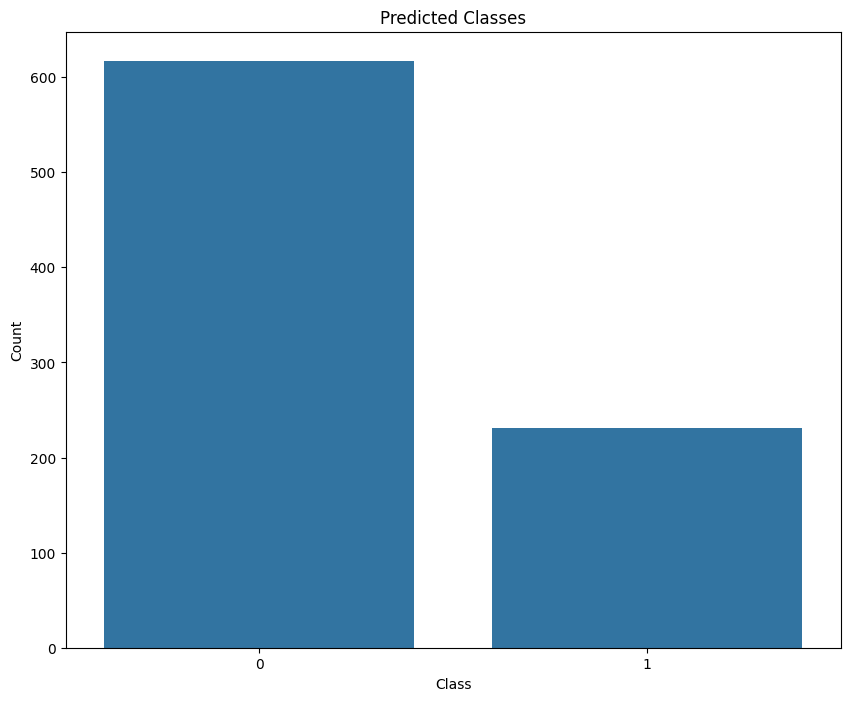

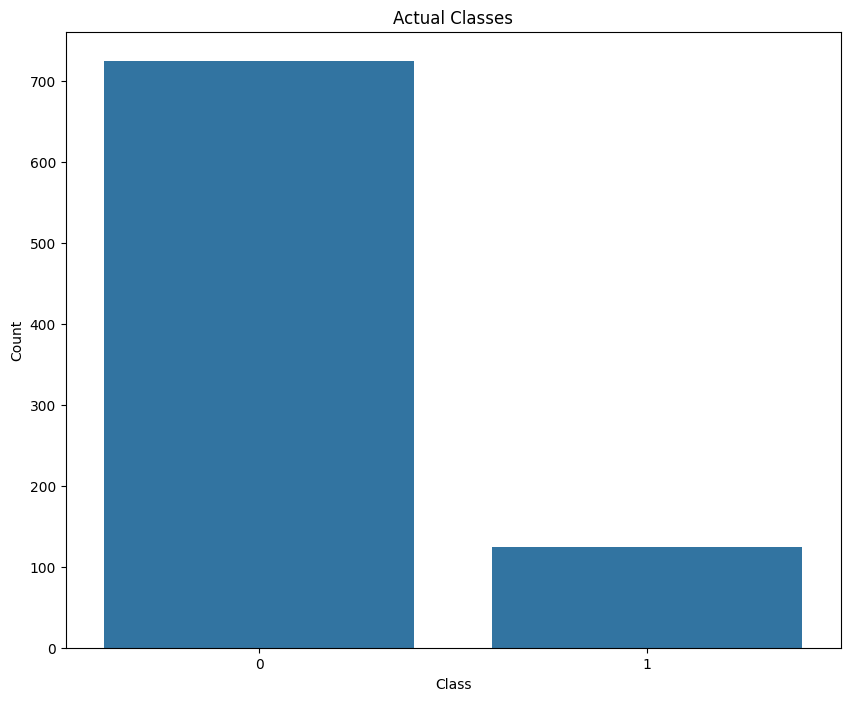

In [31]:
# Visualization
plt.figure(figsize=(10, 8))
sns.countplot(x=predictions)
plt.title("Predicted Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()



plt.figure(figsize=(10, 8))
sns.countplot(x=y_test)
plt.title("Actual Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [25]:
# Train and predict
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [26]:
# Evaluate
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6945754716981132


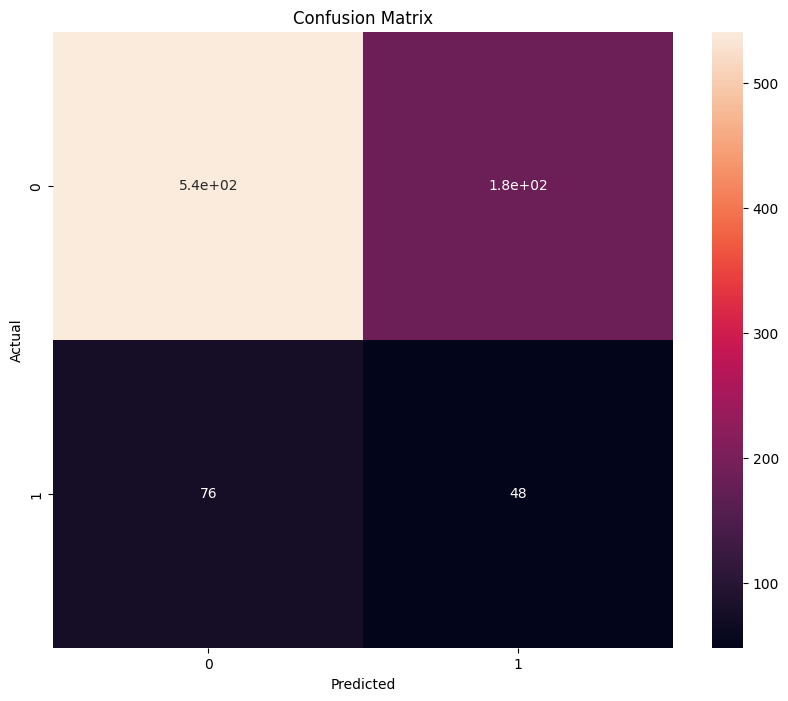

In [32]:
# Visualization


plt.figure(figsize=(10, 8))
sns.heatmap(pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted']), annot=True)
plt.title("Confusion Matrix")
plt.show()